In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('student_data.csv')
data

Using TensorFlow backend.


,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


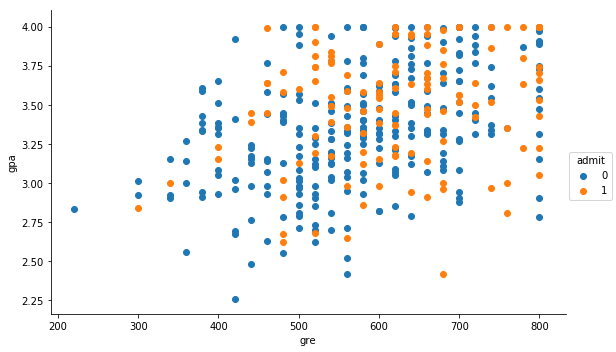

In [10]:
_admits = [0,1]
fg = sns.FacetGrid(data=data, hue='admit', hue_order=_admits, aspect=1.61, size=5)
fg.map(plt.scatter, 'gre', 'gpa').add_legend()

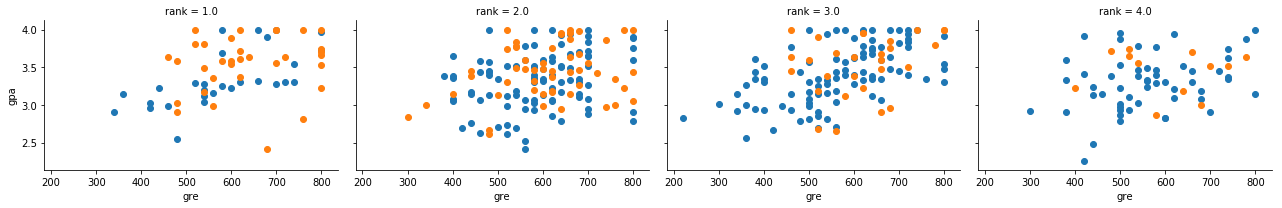

In [16]:
g = sns.FacetGrid(data, col="rank", margin_titles=True, hue='admit', hue_order=_admits, aspect=1.5, size=3)
g.map(plt.scatter, 'gre', 'gpa')

In [32]:
import keras
from keras.utils import np_utils

# remove NaNs
data = data.fillna(0)

# One-hot encoding the rank
processed_data = pd.get_dummies(data, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
processed_data["gre"] = processed_data["gre"]/800
processed_data["gpa"] = processed_data["gpa"]/4

# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(data["admit"],2)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(7,)))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               1024      
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 258       
Total params: 17,794.0
Trainable params: 17,794.0
Non-trainable params: 0.0
_________________________________________________________________


In [58]:
# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)

In [59]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

 32/268 [==>...........................] - ETA: 0s
 Training Accuracy: 0.6865671650687261
 32/132 [======>.......................] - ETA: 0s
 Testing Accuracy: 0.6818181818181818
